In [1]:
import numpy as np
import pandas as pd
import tqdm
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import scale, robust_scale, minmax_scale, maxabs_scale
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import random

C:\ProgramData\Anaconda1\lib\site-packages\ipykernel\parentpoller.py:116: UserWarning: Parent poll failed.  If the frontend dies,
                the kernel may be left running.  Please let us know
                about your system (bitness, Python, etc.) at
                ipython-dev@scipy.org
  ipython-dev@scipy.org""")


### 10대 Cluster

In [8]:
data_cluster = pd.read_csv('data_clustering.csv', dtype={"CLNT_ID":np.str},thousands=",")
data_cluster.head()

,CLNT_ID,ACTIVE_DAYS,N_LOGIN,PURCHASE_CYCLE,SESS_SEQ,TOT_PAG_VIEW_CT,TOT_SESS_HR_V,TOTAL_BUY_AM_x,TOTAL_BUY_AM_y,TOTAL_CT,...,CLAC0_2,CLAC0_3,CLAC0_4,CLAC0_5,CLAC0_6,CLAC0_7,CLAC0_8,CLAC0_9,CLNT_GENDER,CLNT_AGE
0,8,118,2,59.0,4.5,46.500000,417.000000,38000.000000,76000,2,...,0,0,0,0,0,0,2,0,M,20
1,14,20,1,20.0,5.0,256.000000,7098.000000,34900.000000,69800,2,...,0,0,0,0,0,0,2,0,F,30
2,32,20,2,10.0,101.4,98.200000,2169.000000,15360.000000,76800,5,...,0,0,0,0,0,0,5,0,M,40
3,56,97,2,48.5,82.0,45.666667,1157.666667,7933.333333,23800,3,...,0,0,0,0,1,0,0,2,F,40
4,58,74,1,74.0,8.0,195.000000,3161.000000,21850.000000,131100,6,...,0,1,0,0,0,0,5,0,F,30


In [9]:
data_cluster.columns

Index(['CLNT_ID', 'ACTIVE_DAYS', 'N_LOGIN', 'PURCHASE_CYCLE', 'SESS_SEQ',
       'TOT_PAG_VIEW_CT', 'TOT_SESS_HR_V', 'TOTAL_BUY_AM_x', 'TOTAL_BUY_AM_y',
       'TOTAL_CT', 'DVC_desktop', 'DVC_mobile', 'DVC_tablet', 'ZON_Busan',
       'ZON_Chungcheongbuk-do', 'ZON_Chungcheongnam-do', 'ZON_Daegu',
       'ZON_Daejeon', 'ZON_Gangwon-do', 'ZON_Gwangju', 'ZON_Gyeonggi-do',
       'ZON_Gyeongsangbuk-do', 'ZON_Gyeongsangnam-do', 'ZON_Incheon',
       'ZON_Jeju-do', 'ZON_Jeollabuk-do', 'ZON_Jeollanam-do', 'ZON_Seoul',
       'ZON_Ulsan', 'month_4', 'month_5', 'month_6', 'month_7', 'month_8',
       'month_9', 'day_Friday', 'day_Monday', 'day_Saturday', 'day_Sunday',
       'day_Thursday', 'day_Tuesday', 'day_Wednesday', 'weekend_weekday',
       'weekend_weekend', 'CLAC0_0', 'CLAC0_1', 'CLAC0_2', 'CLAC0_3',
       'CLAC0_4', 'CLAC0_5', 'CLAC0_6', 'CLAC0_7', 'CLAC0_8', 'CLAC0_9',
       'CLNT_GENDER', 'CLNT_AGE'],
      dtype='object')

In [10]:
cluster = data_cluster.loc[data_cluster['CLNT_AGE'] == 10]
del data_cluster
cluster = cluster.drop(['CLNT_ID','CLNT_AGE'], axis=1)
print(cluster.shape)
cluster.head()

(3807, 54)


,ACTIVE_DAYS,N_LOGIN,PURCHASE_CYCLE,SESS_SEQ,TOT_PAG_VIEW_CT,TOT_SESS_HR_V,TOTAL_BUY_AM_x,TOTAL_BUY_AM_y,TOTAL_CT,DVC_desktop,...,CLAC0_1,CLAC0_2,CLAC0_3,CLAC0_4,CLAC0_5,CLAC0_6,CLAC0_7,CLAC0_8,CLAC0_9,CLNT_GENDER
129,122,2,61.0,23.000000,31.500000,511.000000,135000.000000,270000,2,0.0,...,0,0,1,0,0,0,0,0,1,F
346,144,4,36.0,74.333333,221.666667,2905.333333,39366.666667,236200,6,0.0,...,0,0,2,0,0,0,0,1,3,F
355,14,2,7.0,14.333333,69.333333,481.333333,88066.666667,264200,3,0.0,...,0,0,2,0,0,0,0,0,1,M
382,46,2,23.0,12.500000,85.000000,1679.500000,85100.000000,170200,2,0.0,...,0,0,2,0,0,0,0,0,0,F
446,27,2,13.5,3.500000,53.000000,420.000000,138000.000000,276000,2,0.0,...,0,0,2,0,0,0,0,0,0,F


In [13]:
from sklearn.preprocessing import LabelEncoder
number = LabelEncoder()
cluster['CLNT_GENDER'] = number.fit_transform(cluster['CLNT_GENDER'].astype('str'))
cluster.head()

,ACTIVE_DAYS,N_LOGIN,PURCHASE_CYCLE,SESS_SEQ,TOT_PAG_VIEW_CT,TOT_SESS_HR_V,TOTAL_BUY_AM_x,TOTAL_BUY_AM_y,TOTAL_CT,DVC_desktop,...,CLAC0_1,CLAC0_2,CLAC0_3,CLAC0_4,CLAC0_5,CLAC0_6,CLAC0_7,CLAC0_8,CLAC0_9,CLNT_GENDER
129,122,2,61.0,23.000000,31.500000,511.000000,135000.000000,270000,2,0.0,...,0,0,1,0,0,0,0,0,1,0
346,144,4,36.0,74.333333,221.666667,2905.333333,39366.666667,236200,6,0.0,...,0,0,2,0,0,0,0,1,3,0
355,14,2,7.0,14.333333,69.333333,481.333333,88066.666667,264200,3,0.0,...,0,0,2,0,0,0,0,0,1,1
382,46,2,23.0,12.500000,85.000000,1679.500000,85100.000000,170200,2,0.0,...,0,0,2,0,0,0,0,0,0,0
446,27,2,13.5,3.500000,53.000000,420.000000,138000.000000,276000,2,0.0,...,0,0,2,0,0,0,0,0,0,0


In [23]:
cluster['CLNT_GENDER'].value_counts()

0    3007
1     800
Name: CLNT_GENDER, dtype: int64

In [15]:
CLAC0_data = cluster.loc[:, cluster.columns.str.startswith('CLAC0') ]
CLAC0_data.head()

,CLAC0_0,CLAC0_1,CLAC0_2,CLAC0_3,CLAC0_4,CLAC0_5,CLAC0_6,CLAC0_7,CLAC0_8,CLAC0_9
129,0,0,0,1,0,0,0,0,0,1
346,0,0,0,2,0,0,0,0,1,3
355,0,0,0,2,0,0,0,0,0,1
382,0,0,0,2,0,0,0,0,0,0
446,0,0,0,2,0,0,0,0,0,0


In [16]:
CLAC0_data.to_csv('CLAC0_data_A10.csv',index=False)

In [17]:
#대대분류 삭제
cluster_drop = cluster.drop(cluster.loc[:, cluster.columns.str.startswith('CLAC0')], axis = 1)
print(cluster_drop.shape)
cluster_drop.head() 

(3807, 44)


,ACTIVE_DAYS,N_LOGIN,PURCHASE_CYCLE,SESS_SEQ,TOT_PAG_VIEW_CT,TOT_SESS_HR_V,TOTAL_BUY_AM_x,TOTAL_BUY_AM_y,TOTAL_CT,DVC_desktop,...,day_Friday,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday,weekend_weekday,weekend_weekend,CLNT_GENDER
129,122,2,61.0,23.000000,31.500000,511.000000,135000.000000,270000,2,0.0,...,0.5,0.000000,0.000000,0.0,0.000000,0.0,0.5,1.000000,0.000000,0
346,144,4,36.0,74.333333,221.666667,2905.333333,39366.666667,236200,6,0.0,...,0.0,0.166667,0.166667,0.0,0.666667,0.0,0.0,0.833333,0.166667,0
355,14,2,7.0,14.333333,69.333333,481.333333,88066.666667,264200,3,0.0,...,0.0,0.333333,0.000000,0.0,0.666667,0.0,0.0,1.000000,0.000000,1
382,46,2,23.0,12.500000,85.000000,1679.500000,85100.000000,170200,2,0.0,...,0.0,0.000000,0.500000,0.0,0.500000,0.0,0.0,0.500000,0.500000,0
446,27,2,13.5,3.500000,53.000000,420.000000,138000.000000,276000,2,0.0,...,0.0,0.000000,0.000000,0.0,0.500000,0.5,0.0,1.000000,0.000000,0


In [18]:
mms = MinMaxScaler()
mms.fit(cluster_drop) #대대분류 뺀 column들만 갖고
cluster_transformed = mms.transform(cluster_drop)

### Choosing the Number of Clusters : Elbow Method

In [19]:
SSD = []

for k in range(1,10):
    km = KMeans(n_clusters = k)
    km = km.fit(cluster_transformed)
    SSD.append(km.inertia_)

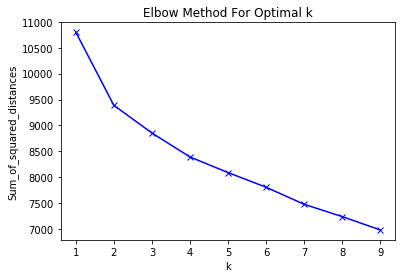

In [20]:
plt.plot(range(1,10), SSD, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [21]:
k=2
km = KMeans(n_clusters = k, algorithm = 'auto')
km.fit(cluster_transformed) # 데이터를 이용하여 클러스터링을 위한 학습 시작하고 중심점 추출

cluster_transformed = pd.DataFrame(cluster_transformed)
cluster_transformed.columns = cluster_drop.columns
cluster_transformed.index = cluster_drop.index
cluster_transformed['predict'] = km.predict(cluster_transformed)
cluster_transformed.head()

,ACTIVE_DAYS,N_LOGIN,PURCHASE_CYCLE,SESS_SEQ,TOT_PAG_VIEW_CT,TOT_SESS_HR_V,TOTAL_BUY_AM_x,TOTAL_BUY_AM_y,TOTAL_CT,DVC_desktop,...,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday,weekend_weekday,weekend_weekend,CLNT_GENDER,predict
129,0.664835,0.012346,0.329670,0.020796,0.059356,0.048823,0.071352,0.035674,0.004695,0.0,...,0.000000,0.000000,0.0,0.000000,0.0,0.5,1.000000,0.000000,0.0,1
346,0.785714,0.037037,0.192308,0.069320,0.441985,0.278033,0.020713,0.031200,0.023474,0.0,...,0.166667,0.166667,0.0,0.666667,0.0,0.0,0.833333,0.166667,0.0,1
355,0.071429,0.012346,0.032967,0.012604,0.135480,0.045983,0.046500,0.034906,0.009390,0.0,...,0.333333,0.000000,0.0,0.666667,0.0,0.0,1.000000,0.000000,1.0,1
382,0.247253,0.012346,0.120879,0.010871,0.167002,0.160684,0.044929,0.022463,0.004695,0.0,...,0.000000,0.500000,0.0,0.500000,0.0,0.0,0.500000,0.500000,0.0,0
446,0.142857,0.012346,0.068681,0.002363,0.102616,0.040111,0.072941,0.036468,0.004695,0.0,...,0.000000,0.000000,0.0,0.500000,0.5,0.0,1.000000,0.000000,0.0,1


In [22]:
cluster_transformed['predict'].value_counts()

1    2276
0    1531
Name: predict, dtype: int64

In [25]:
# predict clustering 0
idx = np.where(cluster_transformed['predict'] == 0)
cluster_0 = cluster.loc[cluster.index[idx]]

# predict clustering 1
idx = np.where(cluster_transformed['predict'] == 1)
cluster_1 = cluster.loc[cluster.index[idx]]

# # predict clustering 2
# idx = np.where(cluster_transformed['predict'] == 2)
# cluster_2 = cluster.loc[cluster.index[idx]]

In [26]:
pd.DataFrame({"cluster0":round(cluster_0.mean(),2),"cluster1":round(cluster_1.mean(),2)})

,cluster0,cluster1
ACTIVE_DAYS,98.47,101.73
N_LOGIN,1.82,1.93
PURCHASE_CYCLE,66.16,70.71
SESS_SEQ,22.70,25.12
TOT_PAG_VIEW_CT,84.86,80.55
TOT_SESS_HR_V,1281.28,1246.12
TOTAL_BUY_AM_x,51171.76,51330.49
TOTAL_BUY_AM_y,146167.00,158590.50
TOTAL_CT,3.20,3.61
DVC_desktop,0.00,0.00


In [27]:
labels = ['furniture','electronic','pet','sports','food','travel','baby','kitchen','fashion','beauty']

In [28]:
sum_of_sum = cluster[['CLAC0_0', 'CLAC0_1', 'CLAC0_2', 'CLAC0_3', 'CLAC0_4', 'CLAC0_5','CLAC0_6', 'CLAC0_7', 'CLAC0_8', 'CLAC0_9']].sum()
sum_of_sum

CLAC0_0      63
CLAC0_1     311
CLAC0_2     231
CLAC0_3    3957
CLAC0_4     480
CLAC0_5     188
CLAC0_6     290
CLAC0_7     344
CLAC0_8    3867
CLAC0_9    3391
dtype: int64

<BarContainer object of 10 artists>

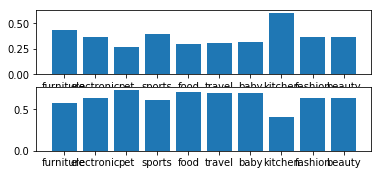

In [29]:
# Cluster 0 
sum0 = cluster_0[['CLAC0_0', 'CLAC0_1', 'CLAC0_2', 'CLAC0_3', 'CLAC0_4', 'CLAC0_5','CLAC0_6', 'CLAC0_7', 'CLAC0_8', 'CLAC0_9']].sum()
plt.subplot(3, 1, 1)
plt.bar(labels, sum0/sum_of_sum)

# Cluster 1 
sum1 = cluster_1[['CLAC0_0', 'CLAC0_1', 'CLAC0_2', 'CLAC0_3', 'CLAC0_4', 'CLAC0_5','CLAC0_6', 'CLAC0_7', 'CLAC0_8', 'CLAC0_9']].sum()
plt.subplot(3, 1, 2)
plt.bar(labels, sum1/sum_of_sum)

# # Cluster 2
# sum2 = cluster_2[['CLAC0_0', 'CLAC0_1', 'CLAC0_2', 'CLAC0_3', 'CLAC0_4', 'CLAC0_5','CLAC0_6', 'CLAC0_7', 'CLAC0_8', 'CLAC0_9']].sum()
# plt.subplot(3, 1, 3)
# plt.bar(labels, sum2/sum_of_sum)

In [30]:
clutering = pd.concat([sum0,sum1],axis=1)
#clutering = clutering.reindex(['오'])
clutering['labels'] = ['furniture','electronic','pet','sports','food','travel','baby','kitchen','fashion','beauty']
clutering

,0,1,labels
CLAC0_0,27,36,furniture
CLAC0_1,113,198,electronic
CLAC0_2,62,169,pet
CLAC0_3,1549,2408,sports
CLAC0_4,140,340,food
CLAC0_5,57,131,travel
CLAC0_6,90,200,baby
CLAC0_7,206,138,kitchen
CLAC0_8,1409,2458,fashion
CLAC0_9,1249,2142,beauty


In [31]:
pd.concat([sum0/sum_of_sum,sum1/sum_of_sum],axis=1)

,0,1
CLAC0_0,0.428571,0.571429
CLAC0_1,0.363344,0.636656
CLAC0_2,0.268398,0.731602
CLAC0_3,0.391458,0.608542
CLAC0_4,0.291667,0.708333
CLAC0_5,0.303191,0.696809
CLAC0_6,0.310345,0.689655
CLAC0_7,0.598837,0.401163
CLAC0_8,0.364365,0.635635
CLAC0_9,0.368328,0.631672


<BarContainer object of 10 artists>

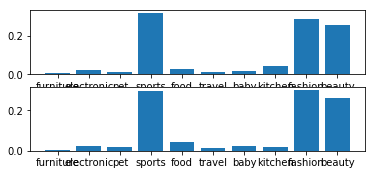

In [32]:
# Cluster 0 
sum0 = cluster_0[['CLAC0_0', 'CLAC0_1', 'CLAC0_2', 'CLAC0_3', 'CLAC0_4', 'CLAC0_5','CLAC0_6', 'CLAC0_7', 'CLAC0_8', 'CLAC0_9']].sum()
plt.subplot(3, 1, 1)
plt.bar(labels, sum0/sum0.sum())

# Cluster 1 
sum1 = cluster_1[['CLAC0_0', 'CLAC0_1', 'CLAC0_2', 'CLAC0_3', 'CLAC0_4', 'CLAC0_5','CLAC0_6', 'CLAC0_7', 'CLAC0_8', 'CLAC0_9']].sum()
plt.subplot(3, 1, 2)
plt.bar(labels, sum1/sum1.sum())

# # Cluster 2
# sum2 = cluster_2[['CLAC0_0', 'CLAC0_1', 'CLAC0_2', 'CLAC0_3', 'CLAC0_4', 'CLAC0_5','CLAC0_6', 'CLAC0_7', 'CLAC0_8', 'CLAC0_9']].sum()
# plt.subplot(3, 1, 3)
# plt.bar(labels, sum2/sum2.sum())

### predict by clustering score 

In [51]:
def clustering_score(k, new_data, data, transformed_data, category) :
    # k : clustering 개수
    # new_data : new data
    # data : F_20 처럼 m2에서 나이와 성별만 지정한 데이터. 대대분류 포함됨
    # transformed_data : F_20_transformed 처럼 성별과 나이대를 지정하고, predict column이 추가된 transforemd data
    # category : score를 원하는 원하는 대대분류
    
    category_rate = np.empty([k,10])
    
    for i in range(k) :
        idx = np.where(transformed_data['predict']==i)
        clustering = data.loc[data.index[idx]]
        sum_of_sum = np.log(data[['CLAC0_0', 'CLAC0_1', 'CLAC0_2', 'CLAC0_3', 'CLAC0_4', 'CLAC0_5','CLAC0_6', 'CLAC0_7', 'CLAC0_8', 'CLAC0_9']].sum()).sum()
        cate_sum=clustering[['CLAC0_0', 'CLAC0_1', 'CLAC0_2', 'CLAC0_3', 'CLAC0_4', 'CLAC0_5','CLAC0_6', 'CLAC0_7', 'CLAC0_8', 'CLAC0_9']].sum()
        cate_sum[cate_sum== 0] = 1
        category_rate[i] = np.log(cate_sum)/sum_of_sum
        
    diatance_from_centers = [0] * k
    for i in range(k) :
        diatance_from_centers[i] = np.sqrt(sum((km.cluster_centers_[i] - new_data[:44])**2))

    result = [0] * k
    for i in range(k) :
        result[i] = category_rate[i][category]/diatance_from_centers[i]

    return sum(result)

### 전체 score -> radar chart

In [98]:
cluster['CLNT_ID'] = list(cluster.index)
cluster_transformed['CLNT_ID'] = list(cluster.index)

In [36]:
transformed_drop = cluster_transformed.drop(['predict'], axis=1)

In [48]:
len(km.cluster_centers_[0])

44

In [47]:
len(cluster_transformed.iloc[0][:44])

43

In [52]:
score_data = np.empty([cluster_transformed.shape[0],10])
for i in tqdm.tqdm(range(len(labels))) :
    for j in range(cluster_transformed.shape[0]) : 
        score_data[j,i] = clustering_score(2, cluster_transformed.iloc[j], cluster, cluster_transformed, i)*100

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [09:19<00:00, 56.57s/it]


In [58]:
score_data = pd.DataFrame(score_data)
score_data.columns = ['furniture_SCORE','travel_SCORE', 'electronic_SCORE', 'pet_SCORE', 'sports_SCORE','food_SCORE', 'baby_SCORE','kitchen_SCORE','fashion_SCORE','beauty_SCORE']
score_data.head()

,furniture_SCORE,travel_SCORE,electronic_SCORE,pet_SCORE,sports_SCORE,food_SCORE,baby_SCORE,kitchen_SCORE,fashion_SCORE,beauty_SCORE
0,8.747638,12.779138,11.959367,19.182803,13.829289,11.480718,12.578007,12.786465,19.124693,18.794522
1,7.085453,10.330598,9.598882,15.565171,11.139048,9.233552,10.132410,10.475433,15.501177,15.234641
2,5.958879,8.689117,8.077298,13.088898,9.371238,7.768880,8.524292,8.803632,13.035968,12.811763
3,7.155132,10.411265,9.602585,15.746467,11.184230,9.256709,10.174782,10.700644,15.664404,15.396171
4,6.109076,8.908411,8.282103,13.418435,9.608307,7.965604,8.739918,9.023900,13.364403,13.134535


In [59]:
pd.DataFrame({'min':score_data.min(),'mean':score_data.mean(),'max':score_data.max()})

,min,mean,max
furniture_SCORE,4.242900,6.433160,11.735297
travel_SCORE,6.183240,9.369991,17.019465
electronic_SCORE,5.735364,8.673756,15.505441
pet_SCORE,9.324640,14.145125,25.902072
sports_SCORE,6.661309,10.084166,18.170373
food_SCORE,5.519806,8.352591,15.000164
baby_SCORE,6.059502,9.173440,16.533828
kitchen_SCORE,6.289890,9.566893,17.879084
fashion_SCORE,9.283892,14.079053,25.720565
beauty_SCORE,9.124414,13.837477,25.283117


In [60]:
score_data.to_csv('score_A10.csv',index=False)

In [61]:
CLAC_rate = CLAC0_data.div(CLAC0_data.sum(axis=1),axis=0)
CLAC_rate.columns = ['C0_Ratio', 'C1_Ratio', 'C2_Ratio', 'C3_Ratio', 'C4_Ratio', 'C5_Ratio', 'C6_Ratio','C7_Ratio', 'C8_Ratio', 'C9_Ratio']
CLAC_rate.index = score_data.index
CLAC_rate.head()

,C0_Ratio,C1_Ratio,C2_Ratio,C3_Ratio,C4_Ratio,C5_Ratio,C6_Ratio,C7_Ratio,C8_Ratio,C9_Ratio
0,0.0,0.0,0.0,0.500000,0.0,0.0,0.0,0.0,0.000000,0.500000
1,0.0,0.0,0.0,0.333333,0.0,0.0,0.0,0.0,0.166667,0.500000
2,0.0,0.0,0.0,0.666667,0.0,0.0,0.0,0.0,0.000000,0.333333
3,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,0.000000,0.000000
4,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,0.000000,0.000000


In [62]:
CLAC_rate.to_csv('ratio_A10.csv',index=False)

In [63]:
CLAC_rate.shape

(3807, 10)

In [64]:
score_data.shape

(3807, 10)

In [37]:
result_score = CLAC0_data
result_score.index = score_data.index
result_score.head()

,CLAC0_0,CLAC0_1,CLAC0_2,CLAC0_3,CLAC0_4,CLAC0_5,CLAC0_6,CLAC0_7,CLAC0_8,CLAC0_9,furniture_new
0,0,1,0,0,0,0,0,3,5,2,14.729871
1,0,0,3,0,3,0,0,0,1,0,15.566742
2,0,0,0,0,0,0,0,0,1,1,16.555799
3,0,0,0,3,0,0,0,0,0,0,16.263275
4,0,0,0,1,2,0,0,0,0,0,15.312694


In [65]:
result_score =  pd.DataFrame({'index':list(range(score_data.shape[0]))})
result_score.head()

,index
0,0
1,1
2,2
3,3
4,4


In [66]:
import tqdm
result_score['furniture_new'] = score_data['furniture_SCORE']
for i in tqdm.tqdm(range(len(score_data))) :
    if CLAC_rate['C0_Ratio'][i] > 0 :
        result_score['furniture_new'][i] = result_score['furniture_new'][i]*(1 + CLAC_rate['C0_Ratio'][i])

  0%|                                                                                         | 0/3807 [00:00<?, ?it/s]C:\ProgramData\Anaconda1\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
100%|████████████████████████████████████████████████████████████████████████████| 3807/3807 [00:01<00:00, 2636.17it/s]


In [68]:
result_score['travel_new'] = score_data['travel_SCORE']
for i in tqdm.tqdm(range(len(score_data))) :
    if CLAC_rate['C1_Ratio'][i] != 0 :
        result_score['travel_new'][i]=result_score['travel_new'][i]*(1+CLAC_rate['C1_Ratio'][i])

result_score['electronic_new'] = score_data['electronic_SCORE']
for i in tqdm.tqdm(range(len(score_data))) :
    if CLAC_rate['C2_Ratio'][i] != 0 :
        result_score['electronic_new'][i]=score_data['electronic_SCORE'][i]*(1+CLAC_rate['C2_Ratio'][i])

result_score['pet_new'] = score_data['pet_SCORE']
for i in tqdm.tqdm(range(len(score_data))) :
    if CLAC_rate['C3_Ratio'][i] != 0 :
        result_score['pet_new'][i]=score_data['pet_SCORE'][i]*(1+CLAC_rate['C3_Ratio'][i])

result_score['sports_new'] = score_data['sports_SCORE']
for i in tqdm.tqdm(range(len(score_data))) :
    if CLAC_rate['C4_Ratio'][i] != 0 :
        result_score['sports_new'][i]=score_data['sports_SCORE'][i]*(1+CLAC_rate['C4_Ratio'][i])        

C:\ProgramData\Anaconda1\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\ProgramData\Anaconda1\lib\site-packages\ipykernel\__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\ProgramData\Anaconda1\lib\site-packages\ipykernel\__main__.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\ProgramData\Anaconda1\lib\site-packages\ipykernel\__main__.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

In [69]:
result_score['food_new'] = score_data['food_SCORE']
for i in tqdm.tqdm(range(len(score_data))) :
    if CLAC_rate['C5_Ratio'][i] != 0 :
        result_score['food_new'][i]=score_data['food_SCORE'][i]*(1+CLAC_rate['C5_Ratio'][i])  
        
result_score['baby_new'] = score_data['baby_SCORE']
for i in tqdm.tqdm(range(len(score_data))) :
    if CLAC_rate['C6_Ratio'][i] != 0 :
        result_score['baby_new'][i]=score_data['baby_SCORE'][i]*(1+CLAC_rate['C6_Ratio'][i])  
        
result_score['kitchen_new'] = score_data['kitchen_SCORE']
for i in tqdm.tqdm(range(len(score_data))) :
    if CLAC_rate['C7_Ratio'][i] != 0 :
        result_score['kitchen_new'][i]=score_data['kitchen_SCORE'][i]*(1+CLAC_rate['C7_Ratio'][i])  
        
result_score['fashion_new'] = score_data['fashion_SCORE']
for i in tqdm.tqdm(range(len(score_data))) :
    if CLAC_rate['C8_Ratio'][i] != 0 :
        result_score['fashion_new'][i]=score_data['fashion_SCORE'][i]*(1+CLAC_rate['C8_Ratio'][i])  
        
result_score['beauty_new'] = score_data['beauty_SCORE']
for i in tqdm.tqdm(range(len(score_data))) :
    if CLAC_rate['C9_Ratio'][i] != 0 :
        result_score['beauty_new'][i]=score_data['beauty_SCORE'][i]*(1+CLAC_rate['C9_Ratio'][i])  

  0%|                                                                                         | 0/3807 [00:00<?, ?it/s]C:\ProgramData\Anaconda1\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  0%|                                                                                         | 0/3807 [00:00<?, ?it/s]C:\ProgramData\Anaconda1\lib\site-packages\ipykernel\__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  0%|                                                                                         | 0/3807 [00:00<?, ?it/s]C:\ProgramData\Anaconda1\lib\site-packages\ipykernel\__main__.py:14: SettingWit

In [70]:
result_score.isna().sum()

index             0
furniture_new     0
travel_new        0
electronic_new    0
pet_new           0
sports_new        0
food_new          0
baby_new          0
kitchen_new       0
fashion_new       0
beauty_new        0
dtype: int64

In [71]:
pd.DataFrame({'new':result_score['fashion_new'],'orginal':score_data['fashion_SCORE'],'ratio':CLAC_rate['C8_Ratio']}).head(10)

,new,orginal,ratio
0,19.124693,19.124693,0.000000
1,18.084707,15.501177,0.166667
2,13.035968,13.035968,0.000000
3,15.664404,15.664404,0.000000
4,13.364403,13.364403,0.000000
5,24.348177,12.174089,1.000000
6,12.301527,12.301527,0.000000
7,28.228418,18.818945,0.500000
8,26.047354,13.023677,1.000000
9,25.418228,12.709114,1.000000


In [73]:
result_score = result_score.drop(['index'],axis=1)
result_score.head()

,furniture_new,travel_new,electronic_new,pet_new,sports_new,food_new,baby_new,kitchen_new,fashion_new,beauty_new
0,8.747638,12.779138,11.959367,28.774205,13.829289,11.480718,12.578007,12.786465,19.124693,28.191783
1,7.085453,10.330598,9.598882,20.753561,11.139048,9.233552,10.132410,10.475433,18.084707,22.851961
2,5.958879,8.689117,8.077298,21.814830,9.371238,7.768880,8.524292,8.803632,13.035968,17.082351
3,7.155132,10.411265,9.602585,31.492934,11.184230,9.256709,10.174782,10.700644,15.664404,15.396171
4,6.109076,8.908411,8.282103,26.836869,9.608307,7.965604,8.739918,9.023900,13.364403,13.134535


In [74]:
result_score.to_csv('final_score_A10.csv',index=False)

## 시각화

In [83]:
angles = np.linspace(0, 2*np.pi, len(labels), endpoint=False)
angles = np.concatenate((angles,[angles[0]]))

mean_stats = result_score.mean().values
mean_stats = np.concatenate((mean_stats,[mean_stats[0]]))

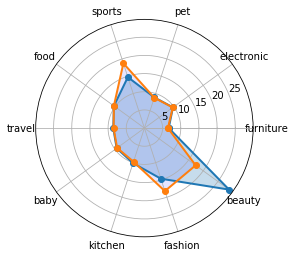

In [84]:
stats = result_score.iloc[10].values
stats = np.concatenate((stats,[stats[0]]))

fig=plt.figure()
ax = fig.add_subplot(111, polar=True)
ax.plot(angles, stats, 'o-', linewidth=2)
ax.fill(angles, stats, alpha=0.25)
ax.set_thetagrids(angles * 180/np.pi, labels)
ax.plot(angles, mean_stats, 'o-', linewidth=2)
ax.fill(angles, mean_stats,"b",alpha=0.1)

ax.grid(True)

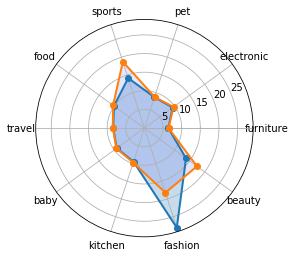

In [85]:
stats = result_score.iloc[30].values
stats = np.concatenate((stats,[stats[0]]))

fig=plt.figure()
ax = fig.add_subplot(111, polar=True)
ax.plot(angles, stats, 'o-', linewidth=2)
ax.fill(angles, stats, alpha=0.25)
ax.set_thetagrids(angles * 180/np.pi, labels)
ax.plot(angles, mean_stats, 'o-', linewidth=2)
ax.fill(angles, mean_stats,"b",alpha=0.1)

ax.grid(True)